In [0]:
import numpy as np
import matplotlib.pyplot as plt

La ecuación diferencial es: \\
$\Phi''+\frac{\xi}{2}\Phi '+\frac{1}{2}\Phi = 0 \\
\Phi''=-\frac{\xi}{2}\Phi'-\frac{1}{2}\Phi$ \\
haciendo \\
$\Phi'=y $ \\
entonces \\
$y'=-\frac{\xi}{2}y-\frac{1}{2}\Phi$ \\
En forma de vectores: \\
$ \vec{q} = \left[ \begin{array}{c} \Phi \\y \end{array} \right], \vec{q}'= \left[ \begin{array}{c} \Phi' \\y' \end{array} \right]= \left[ \begin{array}{c} y \\-\frac{\xi}{2}y-\frac{1}{2}\Phi \end{array} \right]$

In [0]:
'Función para calcular las derivadas'
def Phi_Dot(t_n, q_n): 
  phi, y = q_n
  phi_dot = y
  y_dot = -0.5*t_n*y-0.5*phi 
  
  return np.asarray([phi_dot, y_dot])

In [0]:
def paso_euler_pos(f, t_n, q_n, dt):
    q_dot = f(t_n, q_n)
    q_n_mas_1 = q_n + dt*q_dot
    return q_n_mas_1 

In [0]:
def paso_euler_neg(f, t_n, q_n, dt):
    q_dot = f(t_n, q_n)
    q_n_mas_1 = q_n - dt*q_dot
    return q_n_mas_1 

In [0]:
'Integra la ecuación para el lado derecho'
def integrador_simple(f, t, q_0, dt, paso_euler):
    t_0, t_f = t 
    n = int((t_f-t_0)/dt)  
    d = len(q_0)
    q_tray= np.zeros((n+1, d))
    t = np.linspace(t_0, t_f, n+1)
    q_tray[0,:] = q_0
    for i in range(n):
        q_tray[i+1,:] = paso_euler(f, t[i], q_tray[i,:], dt)
    return t, q_tray

In [0]:
'Integra la ecuación para el lado izquierdo'
def integrador_simple2(f, t, q_0, dt, paso_euler):
    t_0, t_f = t 
    n = int((-t_f-t_0)/dt)  #cambio de signo para no tener dimensión negativa
    d = len(q_0)
    q_tray= np.zeros((n+1, d))
    t = np.linspace(t_0, t_f, n+1)
    q_tray[0,:] = q_0
    for i in range(n):
        q_tray[i+1,:] = paso_euler(f, t[i], q_tray[i,:], dt)
    return t, q_tray

In [0]:
t_pos, yw_pos= integrador_simple(Phi_Dot, [0,10], [1., 0.], 0.01, paso_euler_pos)
t_neg, yw_neg= integrador_simple2(Phi_Dot, [0, -10], [1., 0.], 0.01, paso_euler_neg)

(0, 1.3)

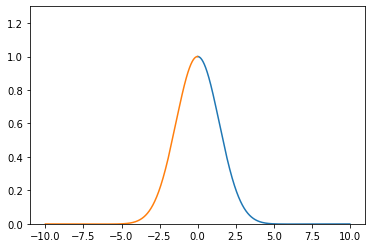

In [8]:
plt.plot(t_pos, yw_pos[:,0])
plt.plot(t_neg, yw_neg[:,0])
plt.ylim([0,1.3])